[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]


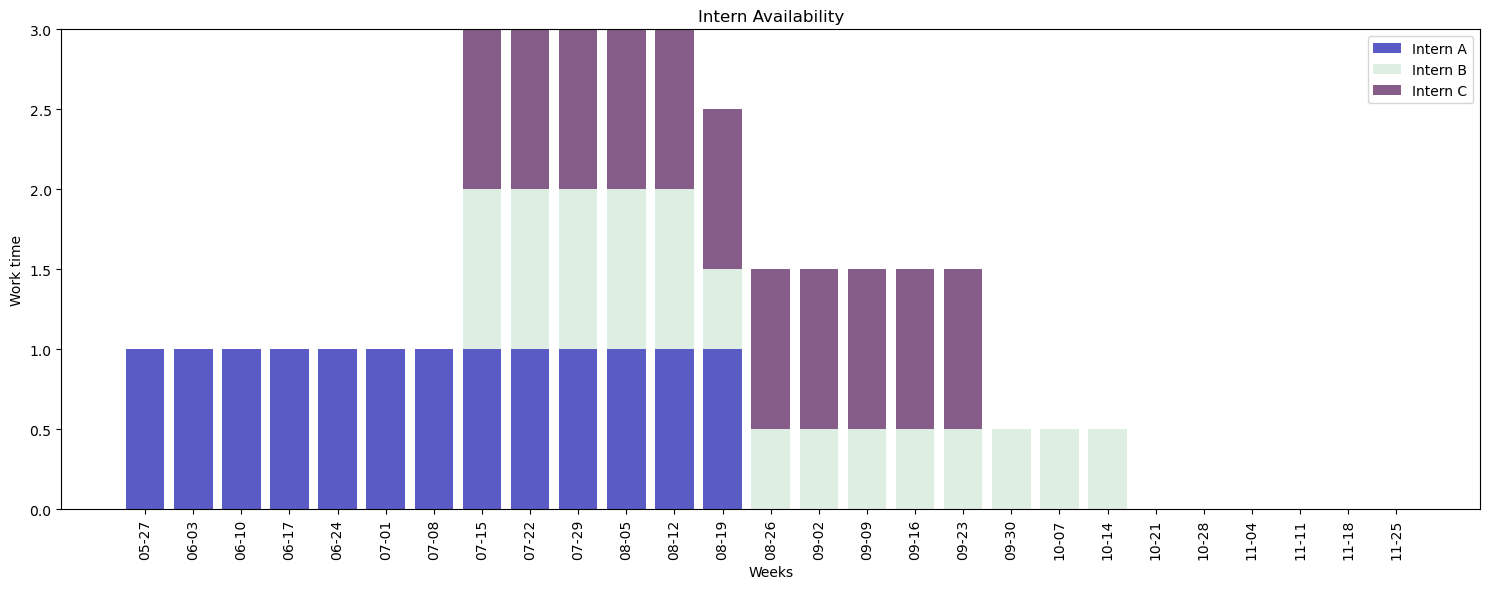

In [7]:
import yaml
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import random

def load_schedule(file_path):
    with open(file_path, 'r') as file:
        return yaml.safe_load(file)

def create_weeks_list(start_date, end_date):
    weeks = []
    current_date = start_date
    while current_date <= end_date:
        weeks.append(current_date.strftime("%m-%d"))
        current_date += timedelta(weeks=1)
    return weeks

def get_intern_availability(intern, weeks):
    availability = [0] * len(weeks)
    for schedule in intern['weeks']:
        for week in weeks:
            if week <= schedule['start']:
                start_idx = weeks.index(week)
            if week >= schedule['end']:
                end_idx = weeks.index(week)
                break
        value = 1 if schedule['time'] == 'full' else 0.5
        for i in range(start_idx, end_idx + 1):
            availability[i] = value
    print(availability)
    return availability

def visualize_schedule(schedule, weeks):
    interns = schedule['interns']
    
    fig, ax = plt.subplots(figsize=(15, 6))
    
    bottom = np.zeros(len(weeks))
    for intern in interns:
        availability = get_intern_availability(intern, weeks)
        color = (random.random(), random.random(), random.random())
        ax.bar(range(len(weeks)), availability, bottom=bottom, width=0.8, color=color, alpha=0.7, label=intern['name'])
        bottom += availability
    
    ax.set_xlabel('Weeks')
    ax.set_ylabel('Work time')
    ax.set_title('Intern Availability')
    ax.set_xticks(range(len(weeks)))
    ax.set_xticklabels(weeks, rotation=90)
    ax.set_ylim(0, len(interns))
    
    ax.legend(loc='upper right')
    
    plt.tight_layout()
    plt.show()

# Main execution
if __name__ == "__main__":
    start_date = datetime(2024, 5, 27)
    end_date = datetime(2024, 11, 25)
    weeks = create_weeks_list(start_date, end_date)
    
    schedule = load_schedule('schedule.yaml')
    visualize_schedule(schedule, weeks)